## Import statements

In [ ]:
# IMPORT STATEMENTS
from readgssi import readgssi
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt

## Track measurement analysis

### Functions

In [13]:
def plot_bscan_real(arr,x,y):
    """ Plot B-scan of arr on IMSHOW with axis x and y
    
    Input:
        arr:    power amplitudes (nxj array)
        x:      rolled distance at recording (x-axis) - n array
        y:      arrival times at recording (y-axis) - j array
    Output:
        (B-Scan plot)
    """

# PLOT
    fig = plt.figure(figsize=(7, 3.5), facecolor='w', edgecolor='w')
    plt.imshow(arr[:,:], 
                extent=[x[0], x[-1], y[-1], y[0]], 
                interpolation='nearest', aspect='auto', cmap='seismic', # Nearest can be changed to hanning
                vmin=-np.amax(np.abs(arr)), vmax=np.amax(np.abs(arr)))
    plt.ylabel("Two way travel time (ns)")
    plt.xlabel("Rolled Distance (m)")
    cb = plt.colorbar()
    cb.set_label('Field strength [V/m]')
    fig.get_axes()[0].set_ylim(25,0)
    fig.get_axes()[0].set_xlim(0.25,1.5)
    fig.get_axes()[0].grid(which='both', axis='both', linestyle='-.')
    plt.show()

In [49]:
import matplotlib.pyplot as plt
def plot_ascan_custom(data,time):
    """ Plots data over time
    
    Input:
        data:   array
        time:   array (same size as data)
    Output:
        (plot)
    """
    
# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(time), np.amax(time)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    fig.get_axes()[0].set_xlim(0,50)


In [25]:
def plot_ascan_real_multiple(filename1, data1, data2, time1, time2, savefig=False):
    """ Plots 2 A-scans (data over time) and saves it if necessary
    
    Input:
        filename1: path to file
        datai:   array amplitude
        timei:   array (same size as datai)
    Output:
        (plot and saved figure)
    """
    # Get name
    (path, filename1) = os.path.split(filename1)

    # Plot
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength normalized'), num='rx1' , figsize=(8, 4), facecolor='w', edgecolor='w')
    line = ax.plot(time1,data1, 'r', lw=2, label=f"2D boxes approximation ")
    line = ax.plot(time2,data2, 'b', lw=2, label=f"SBB track")
    ax.set_xlim([np.amin(time1), np.amax(time1)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename1)[0]
        fig.savefig(path + os.sep + savefile + '.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_ascan_real_multiple3(filename1, data1, data2, data3, time1, time2, time3, savefig=False):
    """ Plots 3 A-scans (data over time) and saves it if necessary
    
    Input:
        filename1: path to file
        datai:   array amplitude
        timei:   array (same size as datai)
    Output:
        (plot and saved figure)
    """
    # Get name
    (path, filename1) = os.path.split(filename1)

    # Plot
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [ns]', ylabel='Ez field strength normalized'), num='rx1' , figsize=(8, 4), facecolor='w', edgecolor='w')
    line = ax.plot(time1,data1, 'r', lw=2, label=f"2D boxes approximation ") # change legend name
    line = ax.plot(time2,data2, 'b', lw=2, label=f"SBB track") # change legend name
    line = ax.plot(time3,data3, 'g', lw=2, label=f"SBB track corrected") # change legend name
    ax.set_xlim([np.amin(time1), np.amax(time1)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename1)[0]
        fig.savefig(path + os.sep + savefile + '.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1

### Analysis and plotting

In [12]:
# IMPORT File
header, arrs, gps = readgssi.readgssi(r"C:\Users\lukas\polybox\Shared\Master thesis Lukas\data\TestTrolley_06_10_2022\PROJECT001__008.DZT", antfreq=[1000,None,None,None])
arr = arrs[0][:,::]
fs = np.int32(header['rhf_spm']) # samples per meter
rg = header['rhf_range'] # range setting
x = np.arange(0, arr.shape[1]/fs+1/fs ,1/fs)[:-1]
y = np.arange(0, rg*(1+1/arr.shape[0]),rg/arr.shape[0])[:-1]
# Average
mean_reponse_7m = arr[:,200:900].mean(axis=1)

# Subtract mean from signal (if needed)
arr_mean = (arr.transpose() - arr.mean(axis=1)).transpose()

2023-01-19 14:30:14 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-19 14:30:14 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-19 14:30:14 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-19 14:30:14 - using user-specified antenna frequency. Please ensure frequency value or list of values is correct.
2023-01-19 14:30:14 - old values: [41000, None, None, None]
2023-01-19 14:30:14 - new values: [1000, None, None, None]
2023-01-19 14:30:14 - more info: rh_ant=['41000SA', None, None, None]
2023-01-19 14:30:14 -            known_ant=[False, None, None, None]
2023-01-19 14:30:14 - please submit a bug report with this warning, the antenna name and frequency
2023-01-19 14:30:14 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-19 14:30:14 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-19 14:30:14 - if possible, please attach a 

In [1]:
# Plot full B-Scan
plot_bscan_real(arr,x,y)

# Plot mean reduced B-Scan
plot_bscan_real(arr_mean,x,y)

NameError: name 'plot_bscan_real' is not defined

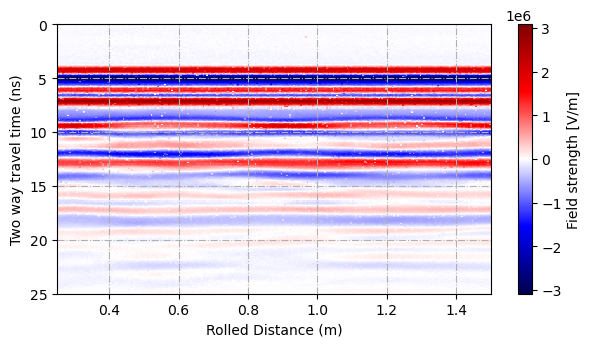

In [15]:
# Cropped
arr_2m = arr[:,0:2*fs]
x_2m = np.arange(0, arr_2m.shape[1]/fs+1/fs ,1/fs)[:-1]
y_2m = np.arange(0, rg*(1+1/arr_2m.shape[0]),rg/arr_2m.shape[0])[:-1]

# Plot corpped B-scan
plot_bscan_real(arr_2m,x_2m,y_2m)

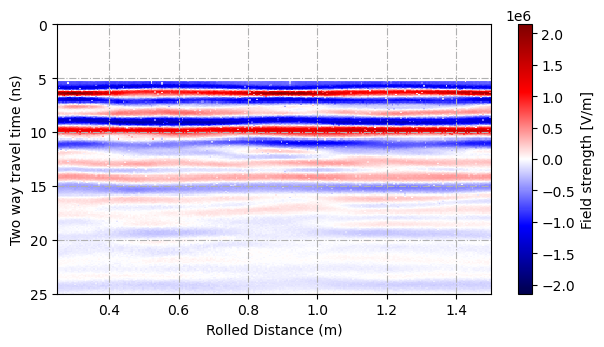

In [18]:
arr_2m_cut = arr_2m

# Filter out direct signal manually
arr_2m_cut[0:85,:] = np.zeros([85,arr_2m_cut.shape[1]])
x_2m = np.arange(0, arr_2m.shape[1]/fs+1/fs ,1/fs)[:-1]

# Shift time to match simulation
y_2m = np.arange(0, rg*(1+1/arr_2m.shape[0]),rg/arr_2m.shape[0])[:-1] -3

# Plot
plot_bscan_real(arr_2m_cut,x_2m,y_2m)

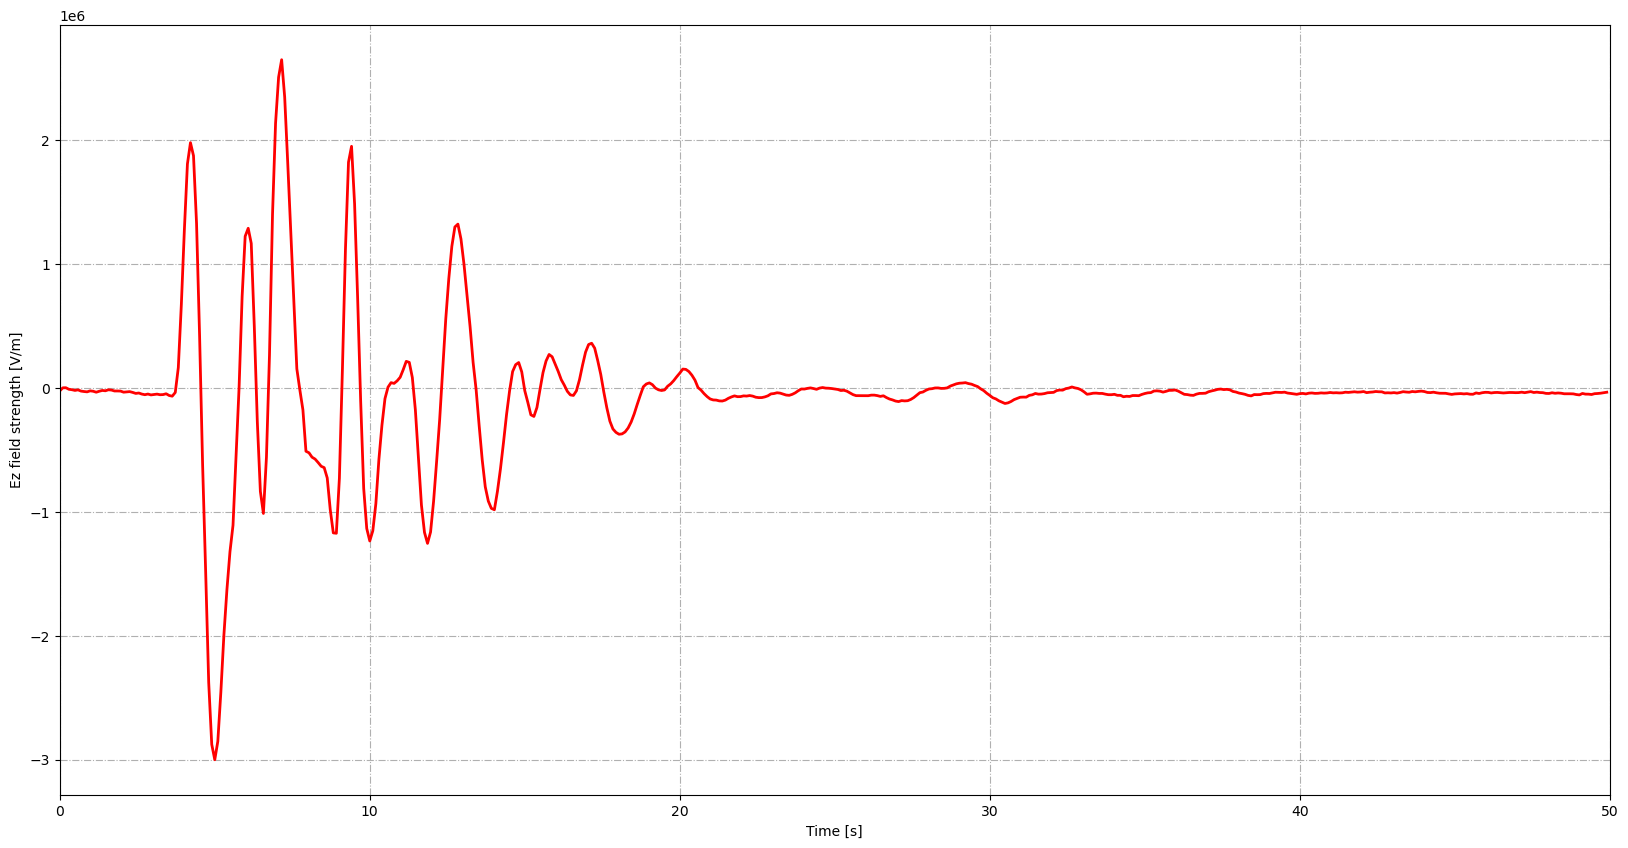

In [26]:
# Average from 0.85m to 0.9m (between sleepers)
lower_bound = round(0.85*fs)
upper_bound = round(0.9*fs)
mean_reponse_between = arr[:,lower_bound:upper_bound].mean(axis=1)
y_time = np.arange(0, rg*(1+1/mean_reponse_between.shape[0]),rg/mean_reponse_between.shape[0])[:-1]

# Plot
plot_ascan_custom(mean_reponse_between,y_time)

### Experiment with noise reduction of track measurement

This does not yet work as the data array is not at the same time stamps (x-axis). The measurements were taken with a different time window. 

2023-01-19 15:35:08 - WARNING: no time zero specified for channel 0, defaulting to rh_zero value (2)
2023-01-19 15:35:08 - WARNING: no DZG file found for GPS input
--------------------WARNING - PLEASE READ---------------------
2023-01-19 15:35:08 - WARNING: could not read frequency for antenna name "'41000SA'"
2023-01-19 15:35:08 - using user-specified antenna frequency. Please ensure frequency value or list of values is correct.
2023-01-19 15:35:08 - old values: [41000, None, None, None]
2023-01-19 15:35:08 - new values: [1000, None, None, None]
2023-01-19 15:35:08 - more info: rh_ant=['41000SA', None, None, None]
2023-01-19 15:35:08 -            known_ant=[False, None, None, None]
2023-01-19 15:35:08 - please submit a bug report with this warning, the antenna name and frequency
2023-01-19 15:35:08 - at https://github.com/iannesbitt/readgssi/issues/new
2023-01-19 15:35:08 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2023-01-19 15:35:08 - if possible, please attach a 

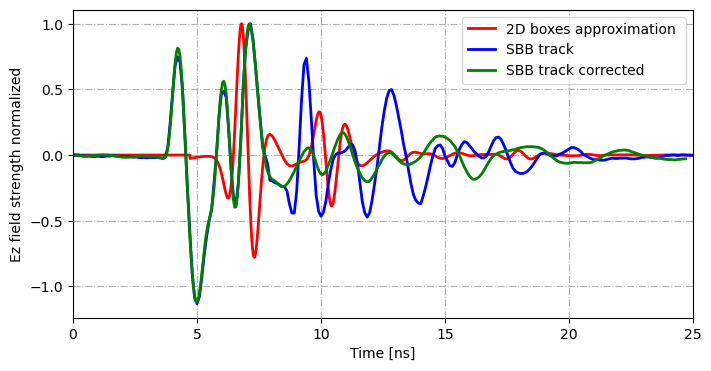

In [62]:
# Import File 1 (real-world data)
header, arrs, gps = readgssi.readgssi(r"C:\Users\lukas\polybox\Shared\Master thesis Lukas\data\TestTrolley_06_10_2022\PROJECT001__008.DZT", antfreq=[1000,None,None,None])
arr = arrs[0][:,::]
fs = np.int32(header['rhf_spm']) # samples per meter
rg = header['rhf_range'] # range setting
x = np.arange(0, arr.shape[1]/fs+1/fs ,1/fs)[:-1]
y = np.arange(0, rg*(1+1/arr.shape[0]),rg/arr.shape[0])[:-1]

# Average from 0.85m to 0.9m between sleepers
lower_bound = round(0.85*fs)
upper_bound = round(0.9*fs)
mean_reponse_between = arr[:,lower_bound:upper_bound].mean(axis=1)
# Normalize
mean_reponse_between_norm = mean_reponse_between/np.amax(mean_reponse_between)

# time
y_time = np.arange(0, rg*(1+1/mean_reponse_between.shape[0]),rg/mean_reponse_between.shape[0])[:-1] 

# Import File 2 (real-world data)
header1, arrs1, gps1 = readgssi.readgssi('data/basecase/Trolley.DZT')
arr1 = arrs1[0][:,::]
rg = header1['rhf_range']
filepath1 = header1['infile']
(path, filename1) = os.path.split(filepath1)
# Average A-scan and shift
shift = 5 # Adjust if necessary
mean_response1 = arr1[:,:].mean(axis=1) 
mean_response1_norm = mean_response1 / np.amax(arr1[:,:].mean(axis=1))
mean_response1_shifted = mean_response1_norm[shift:]
y_time1 = np.arange(0, rg*(1+1/mean_response1.shape[0]),rg/mean_response1.shape[0])[:-1]
time_shifted = y_time1[:-shift]

response_corr = mean_reponse_between_norm[:-shift] - mean_response1_shifted
# plot_ascan_custom(response_corr,time_shifted)

# File 3 (simulation data)
filename1 = "files/output_files/2D_boxes_clean/2D_boxes_clean_box_07ghz_wat_merged.out"

# Open output file and read some attributes
f = h5py.File(filename1, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time1 = np.linspace(0, (iterations - 1) * dt, num=iterations)*10e8

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
f.close()

# Manipulating data
outputdata = np.array(outputdata)
data1 = outputdata[:,18:30]
data1[range(1000),:] = np.zeros([1000,data1.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data_mean1 = data1.mean(axis=1)
data_mean1 = data_mean1/np.amax(data_mean1)

# PLOT:
# plot_ascan_real_multiple(filename1,data_mean1,mean_reponse_between,time1,y_time)
# plot_ascan_real_multiple3(filename1,data_mean1,mean_reponse_between,mean_response1,time1,y_time,y_time1)
plot_ascan_real_multiple3(filename1,data_mean1,mean_reponse_between_norm,mean_response1_shifted,time1,y_time,time_shifted)
# plot_ascan_real_multiple3(filename1,data_mean1,mean_reponse_between_norm,response_corr,time1,y_time,time_shifted)